# Plotting Figure 2barchart
> Comparing analytic, continuous and discrete shape derivative for acoustic duct
- in bar chart version

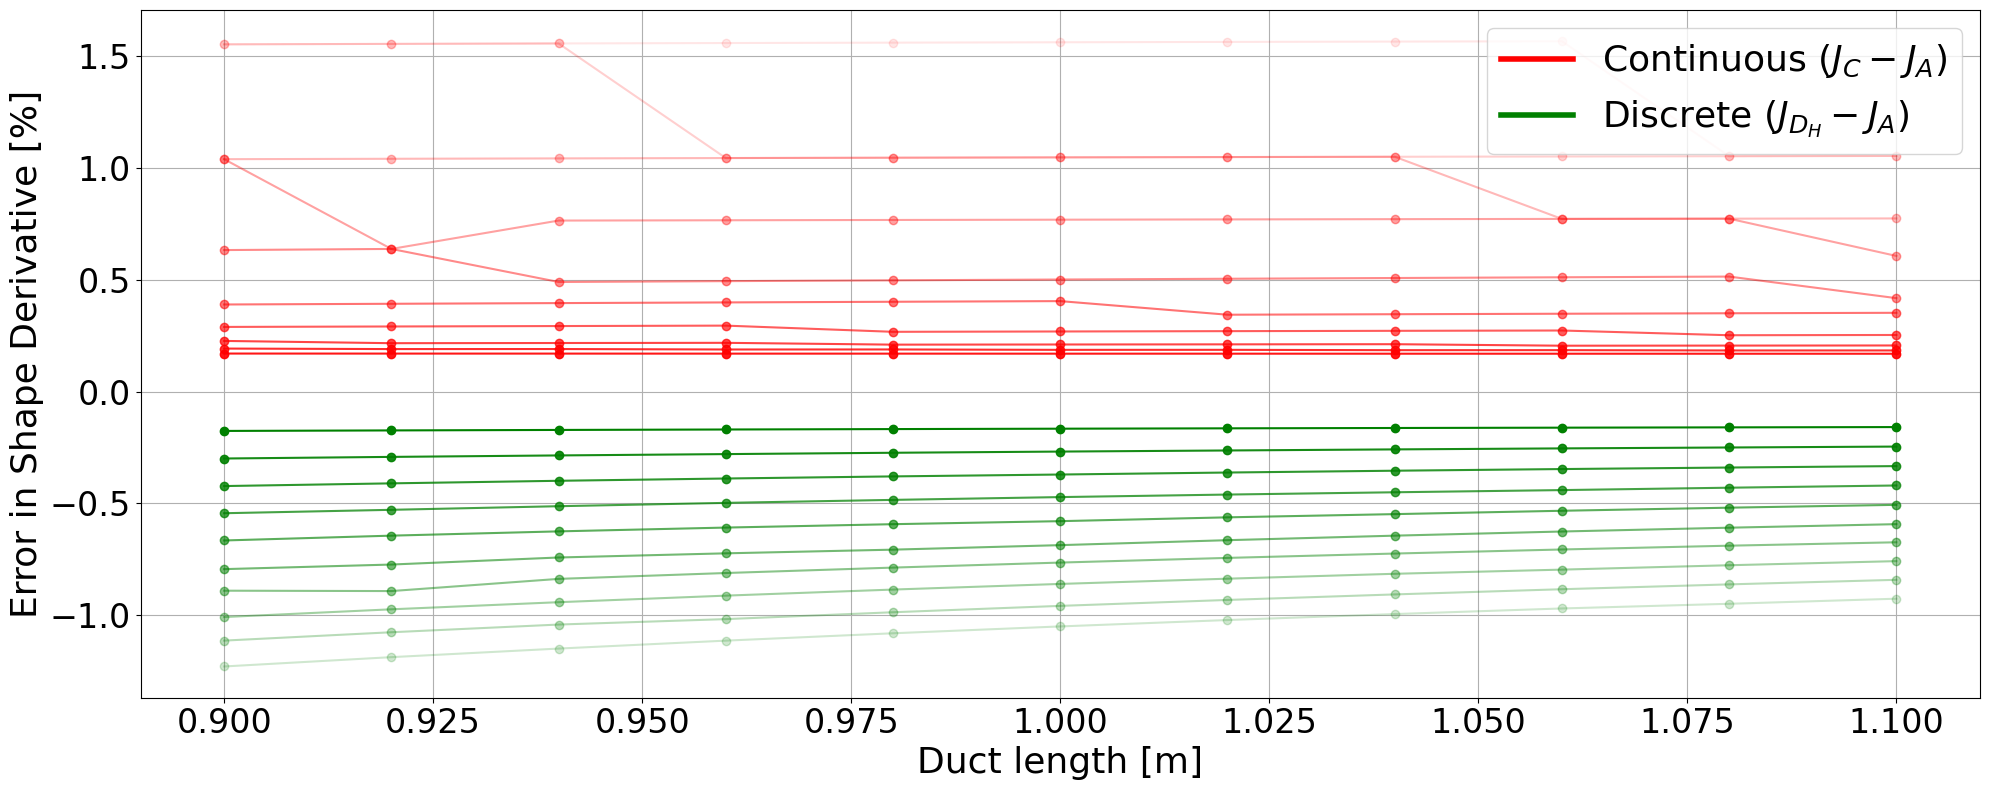

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.lines import Line2D



fontsize=26
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('data_fig12.txt')

# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
duct = []
frequ = []
analytic = []
continuous = []
discrete = []

# read the data from the file
for line in lines[1:]: # skip the first line
    duc, fre, ana, con, dis = map(float, line.strip().split(','))
    duct.append(duc)
    frequ.append(fre)
    analytic.append(ana)
    continuous.append(con)
    discrete.append(dis)

# transform the lists into numpy arrays to perform operations
duct = np.array(duct[:11])
frequ = np.array(frequ[:11])
analytic = np.array(analytic[:11])


# Create arrays for continuous (already done above) and discrete differences for all 5 sets
continuous_arrays = []
for i in range(10):
    start = i * 11
    end = (i + 1) * 11
    arr = (np.array(continuous[start:end]) - analytic) / analytic *100
    continuous_arrays.append(arr)

discrete_arrays = []
for i in range(10):
    start = i * 11
    end = (i + 1) * 11
    arr = (np.array(discrete[start:end]) - analytic)/analytic *100
    discrete_arrays.append(arr)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(20, 8))
lw = 1.5
cont_labels = [
    (continuous_arrays[0], 'red'),
    (continuous_arrays[1], 'red'),
    (continuous_arrays[2],'red'),
    (continuous_arrays[3],'red'),
    (continuous_arrays[4], 'red'),
    (continuous_arrays[5], 'red'),
    (continuous_arrays[6], 'red'),
    (continuous_arrays[7], 'red'),
    (continuous_arrays[8],'red'),
    (continuous_arrays[9], 'red')
]

dis_labels = [
    (discrete_arrays[0], 'green'),
    (discrete_arrays[1], 'green'),
    (discrete_arrays[2], 'green'),
    (discrete_arrays[3], 'green'),
    (discrete_arrays[4], 'green'),
    (discrete_arrays[5], 'green'),
    (discrete_arrays[6], 'green'),
    (discrete_arrays[7], 'green'),
    (discrete_arrays[8], 'green'),
    (discrete_arrays[9], 'green'),

]

count=0.01
for data, color in cont_labels:
    count+=0.09
    ax.plot(duct, data, color=color, alpha=count, marker='o', linewidth=lw)
count=0.1
for data, color in dis_labels:
    count+=0.09
    ax.plot(duct, data, color=color, alpha=count, marker='o', linewidth=lw)


# Set labels and title
ax.set_xlabel('Duct length [m]', fontsize=fontsize)
ax.set_ylabel('Error in Shape Derivative [%]', fontsize=fontsize)
#ax.legend(loc='upper right',fontsize=fontsize)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=24)

custom_lines = [
    Line2D([0], [0], color='red', lw=4, label='Continuous ($J_C-J_A$)'),
    Line2D([0], [0], color='green', lw=4, label='Discrete ($J_{D_H}-J_A$)')
]
ax.legend(handles=custom_lines, loc='upper right', fontsize=fontsize)
# Move the legend outside of the plot
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)

#ax.set_yscale('log')
#ax.set_ylim(-2,2)
# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to the 'Images/' folder
os.makedirs('Images/', exist_ok=True)
fig.savefig(os.path.join('Images/', 'Fig12.png'))

